In [1]:
import tensorflow as tf

In [2]:
# Loading MNIST dataset

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
# After loading MNIST data, divide into training and testing datasets

In [5]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

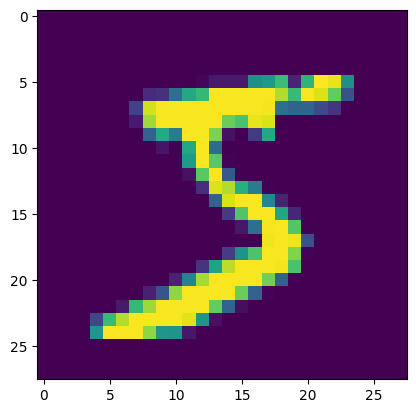

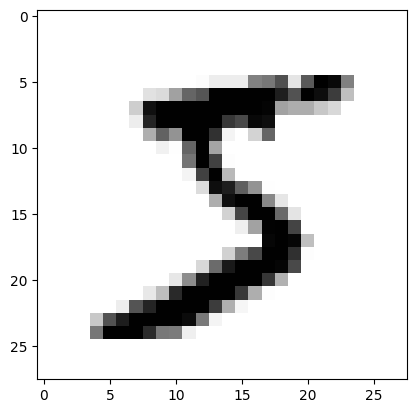

In [7]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()

plt.imshow(X_train[0], cmap = 'binary')

In [8]:
# Checking the values of each pixel, before normalization

In [9]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
# Normalizing hte data | Pre-Processing Step

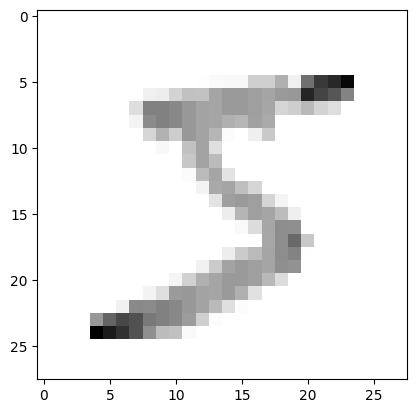

In [11]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = 'binary')

In [12]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
print(y_train[0])

5


In [14]:
# Resizing iamge to make ot suitable for apply Convolution operation

In [15]:
import numpy as np

IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Trainign sampels dimention", X_trainr.shape)
print("Testing smaples dimention", X_testr.shape)

Trainign sampels dimention (60000, 28, 28, 1)
Testing smaples dimention (10000, 28, 28, 1)


In [16]:
# Creating a Deep Neural Network

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

In [18]:
model = Sequential()

# First convolution layer
model.add(Conv2D(64, (3, 3), input_shape=X_trainr.shape[1:], padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolution layer
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third convolution layer
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Fully connected layer 1
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# Fully connected layer 2
model.add(Dense(32))
model.add(Activation("relu"))

# Last fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 activation (Activation)     (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                   

In [20]:
print(len(X_trainr))

60000


In [21]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [22]:
model.fit(X_trainr, y_train, epochs = 5, validation_split=0.3) # training the model

Epoch 1/5
1313/1313 [==============================] - 81s 57ms/step - loss: 0.2965 - accuracy: 0.9099 - val_loss: 0.1118 - val_accuracy: 0.9636
Epoch 2/5
1313/1313 [==============================] - 69s 53ms/step - loss: 0.0873 - accuracy: 0.9728 - val_loss: 0.0932 - val_accuracy: 0.9708
Epoch 3/5
1313/1313 [==============================] - 65s 49ms/step - loss: 0.0637 - accuracy: 0.9808 - val_loss: 0.0603 - val_accuracy: 0.9819
Epoch 4/5
1313/1313 [==============================] - 64s 48ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.0743 - val_accuracy: 0.9757
Epoch 5/5
1313/1313 [==============================] - 63s 48ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0862 - val_accuracy: 0.9738


In [23]:
test_loss = model.evaluate(X_testr, y_test)
test_acc = model.evaluate(X_testr, y_test)
print(f"Test loss of 10000 test samples is {test_loss}")
print(f"Validation accuracy of 10000 test samples is {test_acc}")

313/313 [==============================] - 3s 11ms/step - loss: 0.0735 - accuracy: 0.9774
Test loss of 10000 test samples is [0.07349610328674316, 0.977400004863739]
Validation accuracy of 10000 test samples is [0.07349610328674316, 0.977400004863739]


In [24]:
predictions = model.predict([X_testr])

313/313 [==============================] - 3s 11ms/step


In [25]:
print(predictions)

[[3.8102453e-06 3.1904379e-05 2.6754767e-04 ... 9.9934369e-01
  6.2624815e-05 2.1684488e-04]
 [6.7851077e-05 6.3479674e-04 9.9929142e-01 ... 8.7361866e-07
  3.4805208e-07 1.8416615e-09]
 [9.0604948e-07 9.9995548e-01 1.7822849e-06 ... 6.2175621e-07
  3.1507795e-06 2.1743374e-06]
 ...
 [5.8434819e-11 8.7608453e-07 9.5664497e-11 ... 6.3234566e-08
  2.7898670e-07 1.2879046e-06]
 [3.9018180e-09 4.7520068e-09 5.7551312e-12 ... 3.6298593e-13
  8.6128275e-04 1.0616977e-06]
 [6.6648186e-06 1.0377285e-09 4.7666475e-08 ... 1.5548589e-12
  4.0335229e-07 6.8597842e-08]]


In [26]:
print(np.argmax(predictions[0]))

7


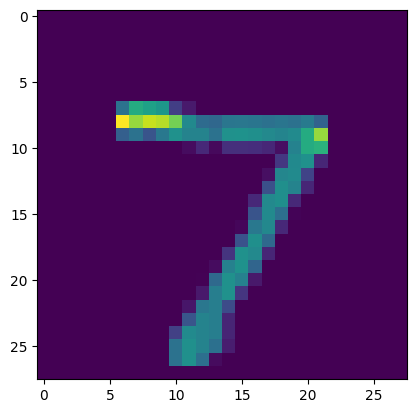

In [27]:
plt.imshow(X_test[0])

In [28]:
print(np.argmax(predictions[128]))

8


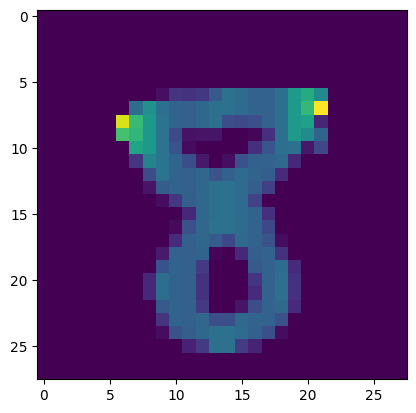

In [29]:
plt.imshow(X_test[128])

In [30]:
print(np.argmax(predictions[100]))

6


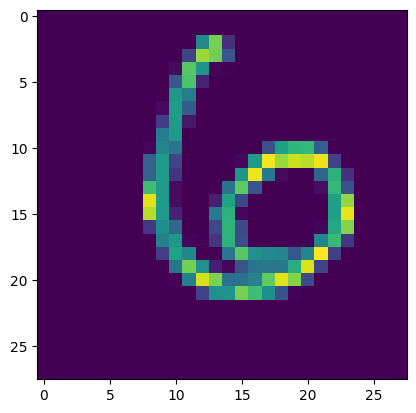

In [31]:
plt.imshow(X_test[100])

In [32]:
import cv2
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('number.png')

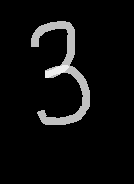

In [33]:
cv2_imshow(image)

In [34]:
image.shape

(184, 134, 3)

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [36]:
resized = cv2.resize(gray, (28,28), interpolation=cv2.INTER_AREA)

In [37]:
resized.shape

(28, 28)

In [38]:
pic = tf.keras.utils.normalize(resized, axis = 1)

In [39]:
pic = np.array(pic).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [40]:
pic.shape

(1, 28, 28, 1)

In [41]:
pred = model.predict(pic)

1/1 [==============================] - 0s 123ms/step


In [42]:
print(np.argmax(pred))

3
